# Importação e carregamento

In [23]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Carregando o dataset
df = pd.read_csv('data_clean.csv')

# Convertendo o formato da coluna data
df['Data'] = pd.to_datetime(df['Data'])

# Calcular a coluna 'TotalVendas'
df['TotalVendas'] = df['Quantidade'] * df['Preco']

# Análise exploratória

## Tendência de vendas ao longo do tempo

In [6]:
# Gerando total de venda por mês
vendas_mensais = df.set_index('Data').resample('M')['TotalVendas'].sum().reset_index()
vendas_mensais['Mes'] = vendas_mensais['Data'].dt.strftime('%m')
vendas_mensais = vendas_mensais.drop(columns=['Data'], axis=1)
vendas_mensais

,TotalVendas,Mes
0,99980.0,01
1,132415.0,02
2,152690.0,03
3,106370.0,04
4,49520.0,05
5,75025.0,06
6,118975.0,07
7,133380.0,08
8,134895.0,09
9,90000.0,10


Gráfico de linhas de venda ao longo do tempo (mensal)

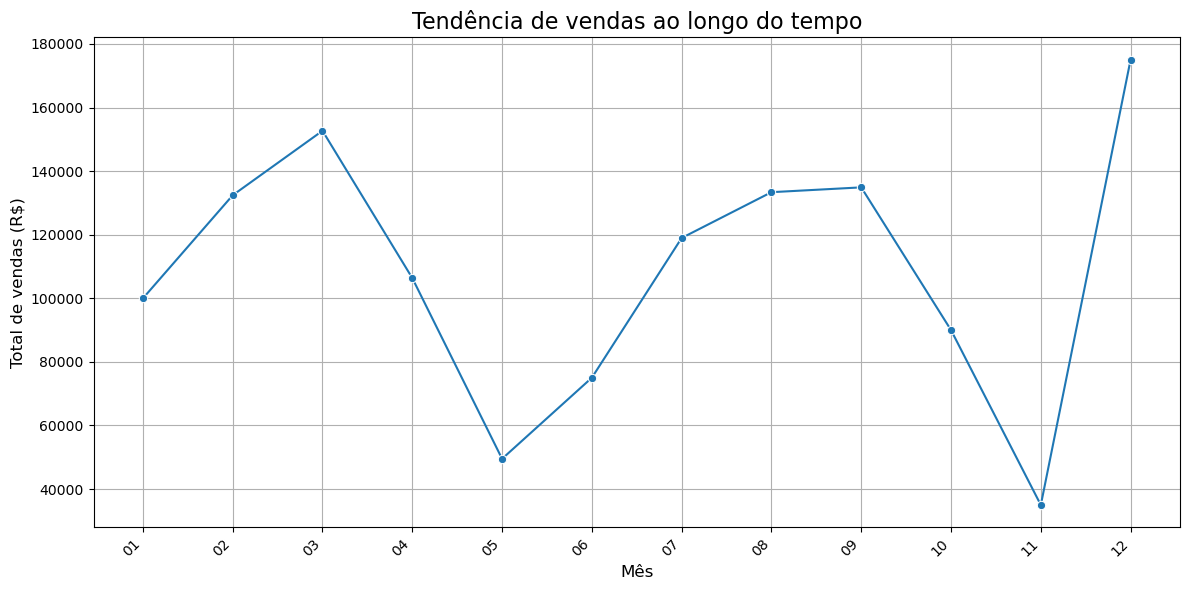

In [7]:
# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(x='Mes', y='TotalVendas', data=vendas_mensais, marker='o')
plt.title('Tendência de vendas ao longo do tempo', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total de vendas (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight interessante: foi possível notar a existência de uma sazonalidade. Medidas para aumento da receita nos meses que geram menos devem ser tomadas.

Gerando média e desvio padrão das vendas por mês

In [8]:
media_vendas = vendas_mensais['TotalVendas'].mean()
desvio_padrao = vendas_mensais['TotalVendas'].std()

print(f"Média de venda por mês: R${media_vendas:.2f}")
print(f"Desvio padrão de venda por mês: R${desvio_padrao:.2f}")

Média de venda por mês: R$108610.00
Desvio padrão de venda por mês: R$41346.85


## Ticket médio

In [9]:
total_vendas = (df['Quantidade'] * df['Preco']).sum()
numero_de_transacoes = len(df)

ticket_medio = total_vendas / numero_de_transacoes

print(f"O ticket médio de vendas é de R${ticket_medio:.2f}.")

O ticket médio de vendas é de R$4344.40.


## Correlação

In [10]:
# Calcular a correlação entre 'Preco' e 'Quantidade'
correlacao = df['Preco'].corr(df['Quantidade'])

# Exibir o resultado
print(f"A correlação entre o preço e a quantidade vendida é de {correlacao:.2f}.")

A correlação entre o preço e a quantidade vendida é de -0.10.


## Tendência de venda por produto

In [12]:
# Calcular o total de unidades vendidas por produto
quantidade_por_produto = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
quantidade_por_produto

Produto
Impressora        230
Webcam            226
Fone de Ouvido    196
Monitor           175
Mouse             165
Laptop            162
SSD               158
Placa de Video    155
Teclado           133
Memoria RAM       108
Name: Quantidade, dtype: int64

Gráfico de barras horizontal total de unidades vendidas por produto

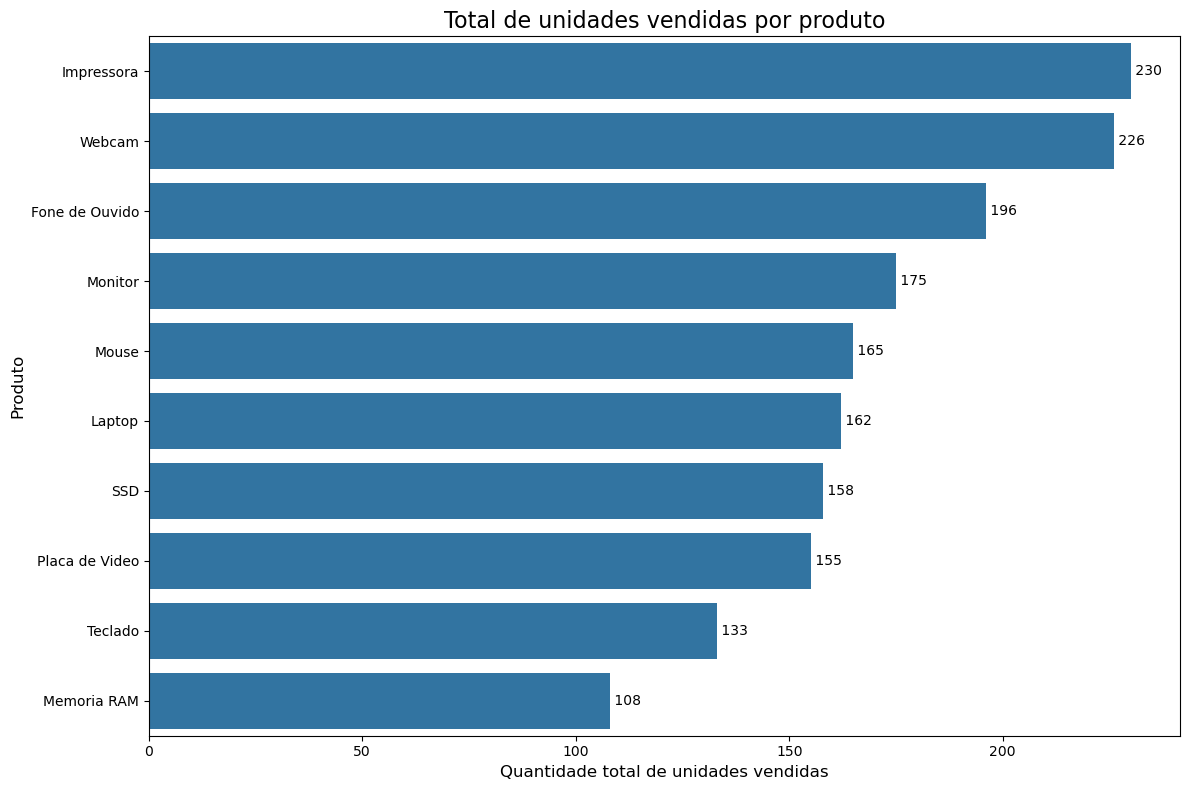

In [13]:
# Criar o gráfico de barras horizontal
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=quantidade_por_produto.values, y=quantidade_por_produto.index)
plt.title('Total de unidades vendidas por produto', fontsize=16)
plt.xlabel('Quantidade total de unidades vendidas', fontsize=12)
plt.ylabel('Produto', fontsize=12)

# Adicionar o valor da quantidade como texto em cada barra
for index, value in enumerate(quantidade_por_produto.values):
    ax.text(value, index, f' {value}', va='center')
plt.tight_layout()

## Tendência de unidades vendidas por mês

In [14]:
# Calculando unidades vendidas por mês
unidades_mensais = df.set_index('Data').resample('M')['Quantidade'].sum().reset_index()
unidades_mensais['Mes'] = unidades_mensais['Data'].dt.strftime('%m')
unidades_mensais = unidades_mensais.drop(columns=['Data'], axis=1)
unidades_mensais

,Quantidade,Mes
0,101,01
1,131,02
2,170,03
3,145,04
4,109,05
5,145,06
6,121,07
7,148,08
8,196,09
9,147,10


Criar o gráfico de linhas

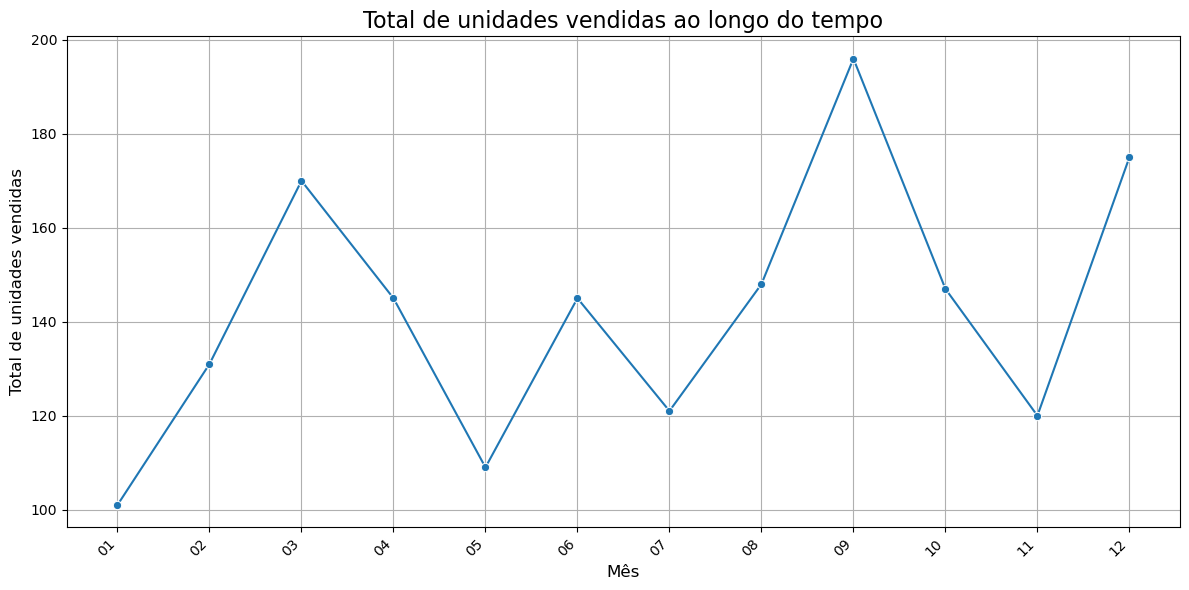

In [15]:
#Criando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='Mes', y='Quantidade', data=unidades_mensais, marker='o')
plt.title('Total de unidades vendidas ao longo do tempo', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total de unidades vendidas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

Gerando média e desvio padrão de quantidade de unidades vendidas por mês

In [16]:
media_quantidades = unidades_mensais['Quantidade'].mean()
desvio_padrao_quantidades = unidades_mensais['Quantidade'].std()

print(f"Média de venda por mês: {media_quantidades:.2f}")
print(f"Desvio padrão de quantidades vendidas por mês: {desvio_padrao_quantidades:.2f}")

Média de venda por mês: 142.33
Desvio padrão de quantidades vendidas por mês: 28.10


## Quantidade de unidades vendidas por categoria

In [17]:
# Agrupando dados
unidades_por_categoria = df.groupby('Categoria')['Quantidade'].sum()
unidades_por_categoria

Categoria
Eletronicos    763
Hardware       421
Perifericos    524
Name: Quantidade, dtype: int64

Gráfico de quantidade vendida por categoria

(-1.0999940585642096,
 1.0999989866976232,
 -1.0999733944616203,
 1.099998733069601)

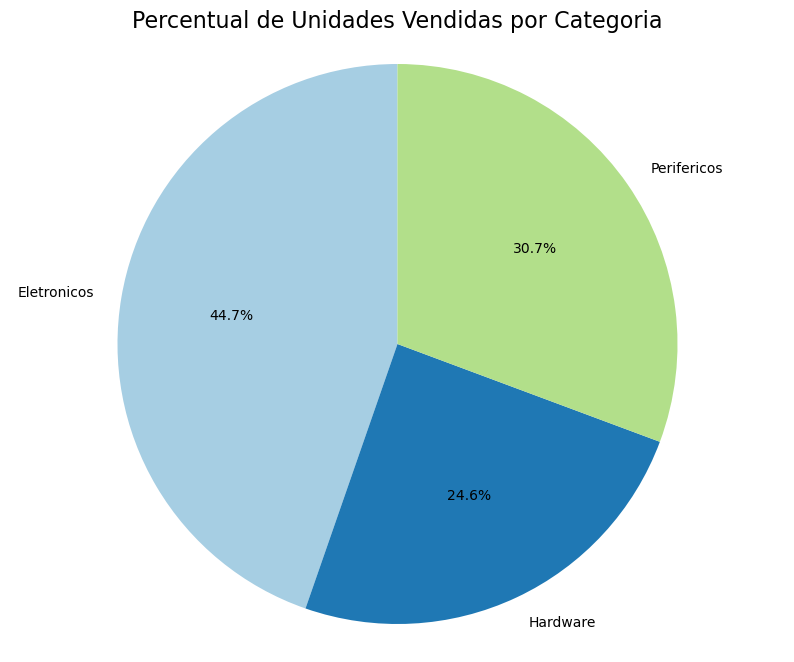

In [18]:
# Criando gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(unidades_por_categoria, labels=unidades_por_categoria.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentual de Unidades Vendidas por Categoria', fontsize=16)
plt.axis('equal') # Garante que o gráfico de pizza seja circular.

## Total de venda por categoria

In [19]:
# Agrupando dados
vendas_por_categoria = df.groupby('Categoria')['TotalVendas'].sum().sort_values(ascending=False)
vendas_por_categoria

Categoria
Hardware       632700.0
Eletronicos    612510.0
Perifericos     58110.0
Name: TotalVendas, dtype: float64

Gráfico de barra do total de venda por categoria

C:\Users\andre\AppData\Local\Temp\ipykernel_51212\1082606262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette='magma')


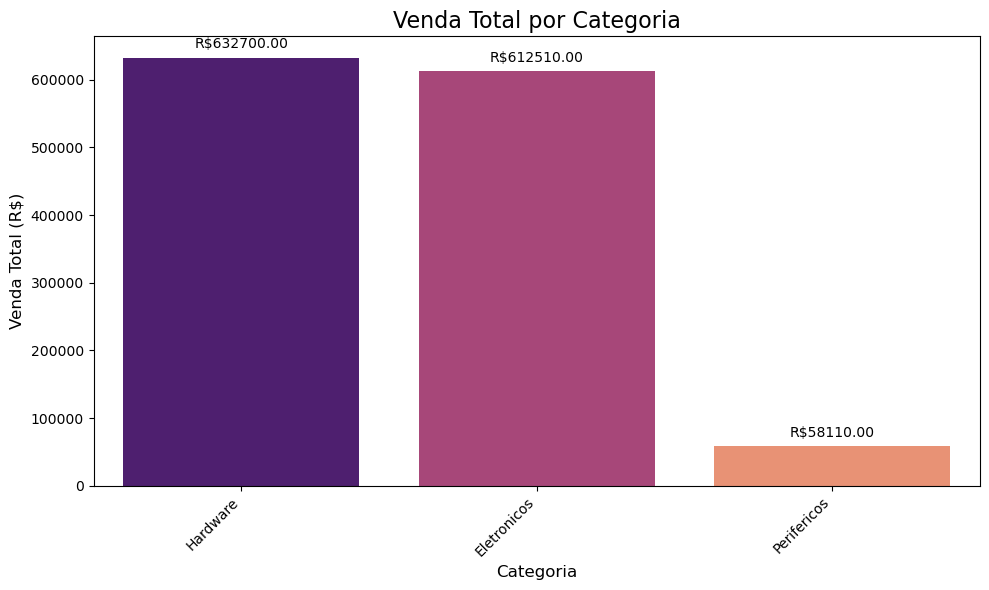

In [20]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette='magma')

for p in ax.patches:
    ax.annotate(f'R${p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Venda Total por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Venda Total (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Insight interessante: apesar da categoria hardware vender menos unidades, é a que gera a maior receita.

## Média de preço por categoria

In [11]:
# Dicionário com as informações dos produtos
produtos_info = {
    'Laptop': {'Categoria': 'Eletronicos', 'Preco': 1800.00},
    'Mouse': {'Categoria': 'Perifericos', 'Preco': 50.00},
    'Teclado': {'Categoria': 'Perifericos', 'Preco': 120.00},
    'Monitor': {'Categoria': 'Eletronicos', 'Preco': 950.00},
    'Webcam': {'Categoria': 'Perifericos', 'Preco': 150.00},
    'Fone de Ouvido': {'Categoria': 'Eletronicos', 'Preco': 85.00},
    'Placa de Video': {'Categoria': 'Hardware', 'Preco': 3500.00},
    'SSD': {'Categoria': 'Hardware', 'Preco': 400.00},
    'Memoria RAM': {'Categoria': 'Hardware', 'Preco': 250.00},
    'Impressora': {'Categoria': 'Eletronicos', 'Preco': 600.00}
}

# Converte o dicionário em um dataframe do pandas
df_produtos = pd.DataFrame.from_dict(produtos_info, orient='index')

# Agrupa por 'Categoria' e calcula a média do 'Preco'
media_preco_por_categoria = df_produtos.groupby('Categoria')['Preco'].mean()

print(f"Média de preço por categoria de produtos:")
print(media_preco_por_categoria)

Média de preço por categoria de produtos:
Categoria
Eletronicos     858.750000
Hardware       1383.333333
Perifericos     106.666667
Name: Preco, dtype: float64
